In [4]:
from rat import RAT

In [5]:
rat_model = RAT(input_dim=22, embed_dim=64, num_heads=4, num_layers=2, output_dim=2)

/Users/dipalshah/Desktop/bitsdatathon/.venv/lib/python3.12/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [6]:
# Get data (assuming this returns DataFrame with all features)
data = rat_model.get_data("AAPL")

# Separate stock price/volume from other features
stock_features = data[['Close', 'Volume']].values  # Price and volume
other_features = data.drop(['Close', 'Volume'], axis=1).values.astype(dtype="float32")  # Other features

# Format data for training
input_length = 30  # 30 days of history
output_length = 15  # predict 15 days ahead
X, y = rat_model.format_data_separate(stock_features, other_features, input_length, output_length)

# Train the model
batch_size = 32
epochs = 100
rat_model.train_model(epochs, batch_size, X, y)

/Users/dipalshah/Desktop/bitsdatathon/.venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/100, Train Loss: 1.058131, Val Loss: 1.001930
Epoch 5/100, Train Loss: 0.965475, Val Loss: 1.140643
Epoch 10/100, Train Loss: 0.952543, Val Loss: 0.959534
Epoch 15/100, Train Loss: 0.949015, Val Loss: 0.989547


KeyboardInterrupt: 

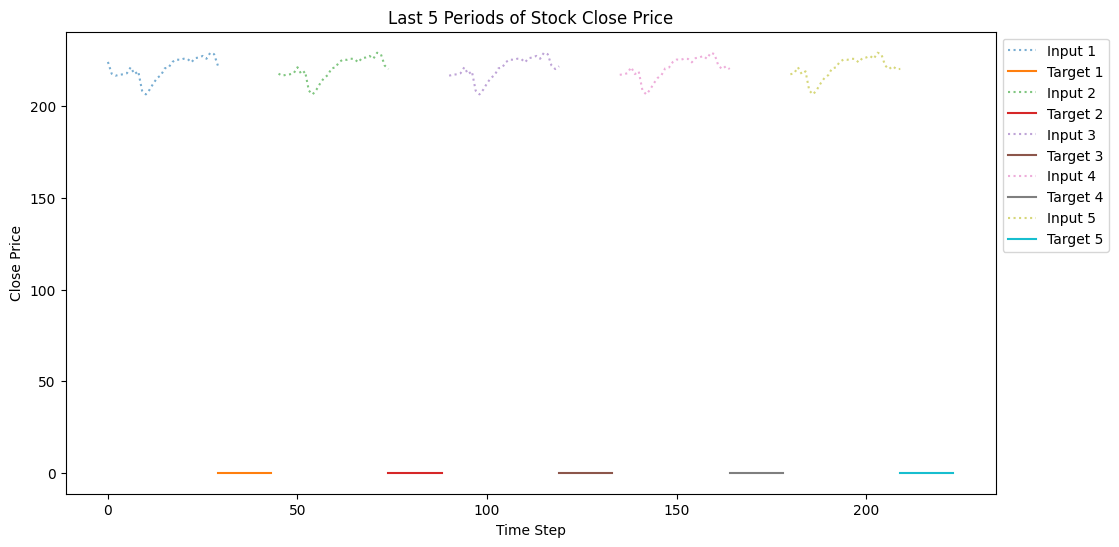

In [ ]:
import matplotlib.pyplot as plt

N = 5

num_samples = X.shape[0]
if N > num_samples:
    N = num_samples  # Ensure N is within range

# Extract the last N periods of input and target for close price
last_X = X[-N:, :, 0].cpu().numpy()  # Shape: (N, input_length)
last_y = rat_model.predict(X)[-N:, :, 0].cpu().numpy()  # Shape: (N, output_length)

# Inverse transform close price (since we scaled it)
close_price_scaler = rat_model.stock_scalers[0]
last_X = close_price_scaler.inverse_transform(last_X)

plt.figure(figsize=(12, 6))

for i in range(N):
    input_range = range(i * (last_X.shape[1] + last_y.shape[1]), i * (last_X.shape[1] + last_y.shape[1]) + last_X.shape[1])
    output_range = range(input_range[-1], input_range[-1] + last_y.shape[1])
    
    plt.plot(input_range, last_X[i], label=f"Input {i+1}", linestyle="dotted", alpha=0.6)
    plt.plot(output_range, last_y[i], label=f"Target {i+1}", linestyle="solid")

plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.title(f"Last {N} Periods of Stock Close Price")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
prediction = rat_model.predict(X[:, -N: , :])

In [ ]:
plt.plot(range(len(X[:, -1, -2])), rat_model.stock_scalers[0].inverse_transform(X[:, -1, -2].cpu().numpy())[0])
plt.plot(range(len(X[:, -1, -2]), len(X[-1][:, -2]) + len(prediction[0][:, 0])), prediction[0][:, 0])

ValueError: Expected 2D array, got 1D array instead:
array=[-1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712  -1.0946712
 -1.0946712   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
  1.3217756   1.3217756   1.3217756   1.3217756   1.3217756   1.3217756
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169 -0.22684169
 -0.22684169 -0.22684169].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.